In [ ]:
!pip install q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"codeprogredire","key":"8f892f6ed92d705ad9f33b58973de1d1"}'}

In [ ]:
 ! mkdir ~/.kaggle 

In [ ]:
 !cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          15215        409  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1416         36  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            882         34  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

In [ ]:
!kaggle datasets download -d carlosrunner/pizza-not-pizza

 96% 97.0M/101M [00:05<00:00, 33.5MB/s]
100% 101M/101M [00:05<00:00, 19.1MB/s] 


In [ ]:
!unzip pizza-not-pizza.zip

Archive:  pizza-not-pizza.zip
  inflating: pizza_not_pizza/food101_subset.py  
  inflating: pizza_not_pizza/not_pizza/1005746.jpg  
  inflating: pizza_not_pizza/not_pizza/1009225.jpg  
  inflating: pizza_not_pizza/not_pizza/1012312.jpg  
  inflating: pizza_not_pizza/not_pizza/1018802.jpg  
  inflating: pizza_not_pizza/not_pizza/1020735.jpg  
  inflating: pizza_not_pizza/not_pizza/1027142.jpg  
  inflating: pizza_not_pizza/not_pizza/102839.jpg  
  inflating: pizza_not_pizza/not_pizza/1043233.jpg  
  inflating: pizza_not_pizza/not_pizza/1045400.jpg  
  inflating: pizza_not_pizza/not_pizza/104773.jpg  
  inflating: pizza_not_pizza/not_pizza/1050956.jpg  
  inflating: pizza_not_pizza/not_pizza/1054362.jpg  
  inflating: pizza_not_pizza/not_pizza/1062097.jpg  
  inflating: pizza_not_pizza/not_pizza/1066151.jpg  
  inflating: pizza_not_pizza/not_pizza/1070772.jpg  
  inflating: pizza_not_pizza/not_pizza/1070867.jpg  
  inflating: pizza_not_pizza/not_pizza/107499.jpg  
  inflating: pizza_not_

Setting up device agnostic code

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Transforming data with torchvision.transforms

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [ ]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our image to (64,64)
    transforms.Resize((64,64)),
    # Turn the image to torch.Tensor
    transforms.ToTensor()
])

In [ ]:
# Path for images
dir = '/content/pizza_not_pizza'

In [ ]:
from torchvision import datasets
data = datasets.ImageFolder(root=dir,
                                  transform=data_transform,  # transform for data
                                  target_transform=None) # transform for label/target

In [ ]:
# Get class names as list
class_names=data.classes
class_names

['not_pizza', 'pizza']

In [ ]:
# Get class names as dict
class_dict = data.class_to_idx
class_dict

{'not_pizza': 0, 'pizza': 1}

In [ ]:
# Length of data
len(data)

25000

In [ ]:
data.samples[0]

('/content/PetImages/Cat/0.jpg', 0)

In [ ]:
# Getting a single image from the dataset
img,label = data[0][0],data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image data type: {img.dtype}")
print(f"Label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.0235, 0.0275, 0.0314,  ..., 0.4745, 0.4549, 0.4392],
         [0.0275, 0.0431, 0.0784,  ..., 0.4902, 0.4745, 0.4510],
         [0.1216, 0.1647, 0.2118,  ..., 0.4941, 0.4902, 0.4627],
         ...,
         [0.2235, 0.2431, 0.2745,  ..., 0.6824, 0.6667, 0.6353],
         [0.2196, 0.2353, 0.2627,  ..., 0.6824, 0.6824, 0.6784],
         [0.2039, 0.2314, 0.2549,  ..., 0.6863, 0.6863, 0.6824]],

        [[0.0157, 0.0196, 0.0196,  ..., 0.4824, 0.4627, 0.4431],
         [0.0196, 0.0314, 0.0667,  ..., 0.4980, 0.4863, 0.4627],
         [0.0941, 0.1412, 0.1843,  ..., 0.5098, 0.5059, 0.4784],
         ...,
         [0.2039, 0.2196, 0.2431,  ..., 0.6941, 0.6824, 0.6471],
         [0.1961, 0.2118, 0.2353,  ..., 0.7020, 0.6980, 0.6941],
         [0.1804, 0.2078, 0.2314,  ..., 0.7059, 0.7020, 0.7020]],

        [[0.0196, 0.0235, 0.0235,  ..., 0.4784, 0.4588, 0.4392],
         [0.0235, 0.0353, 0.0706,  ..., 0.4941, 0.4824, 0.4588],
         [0.0980, 0.1451, 0.1882,  ..., 0.

Text(0.5, 1.0, 'not_pizza')

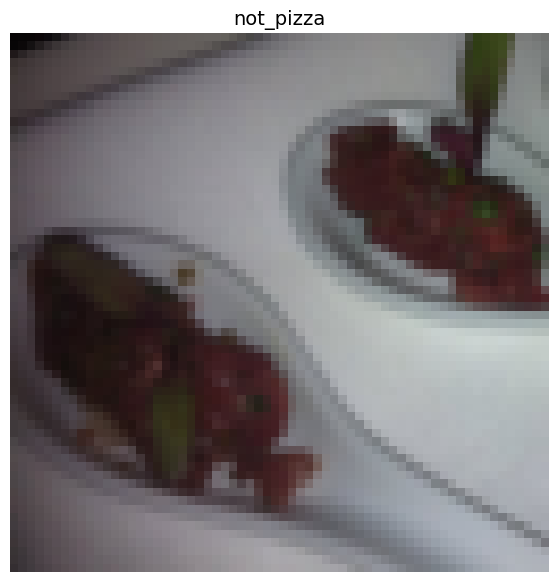

In [ ]:
import matplotlib.pyplot as plt
# Re-arrange the order dimensions
img_permute=img.permute(1,2,0)

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

Splitting data into train and test

In [ ]:
from torch.utils.data import random_split
import torch
torch.manual_seed(42)
train_size = int(0.8 * len(data))
test_size = len(data) - train_size
train_data, test_data = random_split(data, [train_size, test_size])

In [ ]:
len(train_data),len(test_data)

(1572, 394)

Turn loaded images into DataLoader

In [ ]:
# Turn train and test dataset into dataloader
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=0,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=0,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fc1c43d3d30>,
 <torch.utils.data.dataloader.DataLoader at 0x7fc1c43d3940>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(625, 157)

In [ ]:
32*625

20000

In [ ]:
157*32

5024

In [ ]:
img,label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


Create Train and Test loop functions

In [ ]:
# Create train_step() function
def train_step(model,
               dataloader,
               loss_fn,
               optimizer,
               device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss,train_acc=0,0


  # Loop through data loader batches
  for batch, (X,y) in enumerate(dataloader):
    # Send data to target device
    X,y = X.to(device),y.to(device)
    # 1. Forward pass
    y_pred = model(X).squeeze() # outputs model logits
    y_pred_class = torch.round(torch.sigmoid(y_pred))

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_pred,y.float())
    train_loss+=loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate train_acc
    train_acc+= (y_pred_class==y).sum().item()/len(y_pred)
  
  # Adjust metrics to get average loss and accuracy per batch
  train_loss/=len(dataloader)
  train_acc/=len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create test_step()
def test_step(model,
              dataloader,
              loss_fn,
              device):
  # Put model in eval mode
  model.eval()

  test_loss,test_acc=0,0

  with torch.inference_mode():
    # Loop through dataloader
    for batch, (X,y) in enumerate(dataloader):
      # Send X,y to target device
      X,y = X.to(device),y.to(device)
      # 1. Forward pass
      test_pred_logits=model(X).squeeze()

      # 2. Calculate loss
      loss=loss_fn(test_pred_logits,y.float())
      test_loss+=loss.item()

      # 3. Calculathe accuracy
      test_pred_labels = torch.round(torch.sigmoid(test_pred_logits))
      test_acc+=((test_pred_labels==y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accruacy per batch
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
    return test_loss,test_acc



In [ ]:
# Create a train() function to combine both train_step and test_step
def train(model,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn = nn.CrossEntropyLoss(),
          epochs=5,
          device=device):
  # Create empty results dictionary
  results= {
      "train_loss":[],
      "train_acc":[],
      "test_loss":[],
      "test_acc":[]
  }

  # Loop through train_step() and test_step() for a number of epochs
  for epoch in range(epochs):
    train_loss,train_acc=train_step(model,
                                    train_dataloader,
                                    loss_fn,
                                    optimizer,
                                    device)
    test_loss,test_acc=test_step(model,
                                 test_dataloader,
                                 loss_fn,
                                 device)
    
    #Print what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

Creating a model

In [105]:
# Creating an instance of a pretrained model EffNetB0
import torchvision
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT #DEFAULT = Best available weights
model=torchvision.models.efficientnet_b0(weights=weights).to(device)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
# Getting a summary of the model using torchinfo
from torchinfo import summary
summary(model=model,
        input_size=[1,3,64,64],
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 64, 64]       [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 64, 64]       [1, 1280, 2, 2]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 64, 64]       [1, 32, 32, 32]      --                   True
│    │    └─Conv2d (0)                                       [1, 3, 64, 64]       [1, 32, 32, 32]      864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 32, 32]      [1, 32, 32, 32]      64                   True
│    │    └─SiLU (2)                                         [1, 32, 32, 32]      [1, 32, 32, 32]      --                   --
│    └─Sequential (1)                                        [1, 32, 32, 32]      [1, 16, 32, 

In [107]:
# Freezing the base model and changing the output layer to suit our need
for param in model.features.parameters():
  param.requires_grad=False

In [ ]:
summary(model=model,
        input_size=[1,3,64,64],
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 64, 64]       [1, 1000]            --                   Partial
├─Sequential (features)                                      [1, 3, 64, 64]       [1, 1280, 2, 2]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 64, 64]       [1, 32, 32, 32]      --                   False
│    │    └─Conv2d (0)                                       [1, 3, 64, 64]       [1, 32, 32, 32]      (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 32, 32]      [1, 32, 32, 32]      (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 32, 32]      [1, 32, 32, 32]      --                   --
│    └─Sequential (1)                                        [1, 32, 32, 32]      [1, 1

In [108]:
# Update the classifier head of our model to suit our problem
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model.classifier=nn.Sequential(
    nn.Dropout(p=0.2,inplace=True),
    nn.Linear(in_features=1280,
              out_features=1)
)

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1, bias=True)
)

Train a model

In [110]:
# Define loss and optimizer
# Define loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

In [ ]:
# Train our model
NUM_EPOCHS=10
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_result = train(model=model.to(device),
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device
                       )
model_result

Epoch: 0 | Train loss: 0.5778 | Train acc: 0.7156 | Test loss: 0.5056 | Test acc: 0.7721
Epoch: 1 | Train loss: 0.4600 | Train acc: 0.7994 | Test loss: 0.4502 | Test acc: 0.8115
Epoch: 2 | Train loss: 0.4360 | Train acc: 0.8144 | Test loss: 0.4288 | Test acc: 0.8163
Epoch: 3 | Train loss: 0.4049 | Train acc: 0.8237 | Test loss: 0.4122 | Test acc: 0.8236
Epoch: 4 | Train loss: 0.4372 | Train acc: 0.8044 | Test loss: 0.4149 | Test acc: 0.8120
Epoch: 5 | Train loss: 0.4128 | Train acc: 0.8106 | Test loss: 0.4286 | Test acc: 0.8144
Epoch: 6 | Train loss: 0.4079 | Train acc: 0.8244 | Test loss: 0.4111 | Test acc: 0.8240
Epoch: 7 | Train loss: 0.4047 | Train acc: 0.8281 | Test loss: 0.4055 | Test acc: 0.8404
Epoch: 8 | Train loss: 0.3850 | Train acc: 0.8287 | Test loss: 0.4137 | Test acc: 0.8120
